# Working with SQUAD Dataset

In [1]:
import pandas as pd
#from Utils import get_features
import numpy as np
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
%cd gdrive/MyDrive/frozenSuite_Nov9-2/Final_data

/content/gdrive/MyDrive/frozenSuite_Nov9-2/Final_data


In [4]:
%ls

X_test_full.npy  X_train_full.npy  y_test_full.npy  y_train_full.npy


In [5]:
%cd New_Data

/content/gdrive/My Drive/frozenSuite_Nov9-2/New_Data


In [5]:
X_train = np.load('X_train_full.npy',allow_pickle=True)
y_train = np.load('y_train_full.npy',allow_pickle=True)
X_test = np.load('X_test_full.npy',allow_pickle=True)
y_test = np.load('y_test_full.npy',allow_pickle=True)

In [6]:
%cd ..

/content/gdrive/My Drive/frozenSuite_Nov9-2


In [8]:
X_train[1].shape

(30, 10)

In [7]:
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        self.feature_vec = X
        self.output_vec = Y
        
    def __len__(self):
        return len(self.output_vec)

    def __getitem__(self, idx):
        x = torch.flatten(torch.tensor(self.feature_vec[idx]))
        # y = torch.flatten(torch.tensor(self.output_vec[idx]))
        # x = torch.tensor(self.feature_vec[idx])
        y = torch.tensor(self.output_vec[idx])
        return x.type(torch.long) , y.type(torch.long)

In [8]:
train_set = CustomDataset(X_train, y_train)

In [9]:
test_set = CustomDataset(X_test,y_test)

In [10]:
print(train_set.__getitem__(0))

(tensor([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0,  0,  1,  0,  5,  1,  0,
         0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0,  0,  1,  0,  2,
         1,  0,  0,  0,  1,  0,  0,  1,  0,  5,  1,  0,  0,  0,  1,  0,  0,  1,
         0,  4,  1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0,
         0,  1,  0,  3,  1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1,  1,  0,  0,  1,  0,  3,  1,  0,  0,  0, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1,  1,  0,  0,  1,  0,  6,  1,  0,  0,  0,  1,  0,
         0,  1,  1,  2,  1,  0,  0,  0,  1,  0,  0,  1,  0,  3,  0,  0,  0,  0,
         1,  0,  0,  1,  0,  3,  0,  0,  0,  0,  1,  0,  0,  1,  0,  3,  1,  0,
         0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1,

Initializing the Dataloader

In [11]:
test_loader = DataLoader(test_set,batch_size=32,shuffle=False,drop_last=True)

In [12]:
train_loader = DataLoader(train_set, batch_size=128*2*2, shuffle=True, num_workers=2, drop_last=True)

Defining the Model

In [ ]:
class Model(nn.Module):

    def __init__(self,in_features=30*10,h1=2048,h2=2048,h3=1024*2,h4=1024,h5=900,h6=900,h7=800,
                 h8=800,h9 = 800,h10=800,h11=800,h12=800,h13=800,h14=800,h15=800,out_features=30):

In [134]:
class Model(nn.Module):

    def __init__(self,in_features=30*10,h1=500,h2=5000,h3=1000,h4=1000,h5=900,h6=900,h7=800,
                 h8=800,h9 = 800,h10=800,h11=800,h12=800,h13=800,h14=800,h15=800,out_features=30):
        
        # How many layers?
        # Input layer (# of features) --> hidden layer 1 (number of neurons N) --> h2 (N) --> output (346 of classes)
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.bn1 = nn.BatchNorm1d(num_features=h1,momentum=0.1)
        self.d1 =  nn.Dropout(0.8)
        # self.fc2 = nn.Linear(h1,h2)
        # self.d2 =  nn.Dropout(0.8)
        # self.bn2 = nn.BatchNorm1d(num_features=h2,momentum=0.1)
        # self.fc3 = nn.Linear(h2,h3)
        # self.bn3 = nn.BatchNorm1d(num_features=h3,momentum=0.1)
        # self.d3 = nn.Dropout(0.6)
        # self.fc4 = nn.Linear(h3,h4)
        # self.bn4 = nn.BatchNorm1d(num_features=h4,momentum=0.1)
        # self.d4 = nn.Dropout(0.6)
        # self.fc5 = nn.Linear(h4,h5)
        # self.bn5 = nn.BatchNorm1d(num_features=h5,momentum=0.01)
        # self.d5 = nn.Dropout(0.25)
        # self.fc6 = nn.Linear(h5,h6)
        # self.bn6 = nn.BatchNorm1d(num_features=h6,momentum=0.01)
        # self.d6 = nn.Dropout(0.35)
        
        # self.fc7 = nn.Linear(h6,h7)
        # self.bn7 = nn.BatchNorm1d(num_features=h7,momentum=0.01)
        # self.d7 = nn.Dropout(0.4)
        
        # self.fc8 = nn.Linear(h7,h8)
        # self.bn8 = nn.BatchNorm1d(num_features=h8,momentum=0.01)
        # self.d8 = nn.Dropout(0.35)
        
        # self.fc9 = nn.Linear(h8,h9)
        # self.bn9 = nn.BatchNorm1d(num_features=h9,momentum=0.01)
        # self.d9 = nn.Dropout(0.2)
        
        # self.fc10 = nn.Linear(h9,h10)
        # self.bn10 = nn.BatchNorm1d(num_features=h10,momentum=0.01)
        # self.d10 = nn.Dropout(0.25)
        
        # self.fc11 = nn.Linear(h10,h11)
        # self.bn11 = nn.BatchNorm1d(num_features=h11,momentum=0.01)
        # self.d11 = nn.Dropout(0.2)

        # self.fc12 = nn.Linear(h11,h12)
        # self.bn12 = nn.BatchNorm1d(num_features=h12,momentum=0.01)
        # self.d12 = nn.Dropout(0.2)

        # self.fc13 = nn.Linear(h12,h13)
        # self.bn13 = nn.BatchNorm1d(num_features=h13,momentum=0.01)
        # self.d13 = nn.Dropout(0.2)

        # self.fc14 = nn.Linear(h13,h14)
        # self.bn14 = nn.BatchNorm1d(num_features=h14,momentum=0.01)
        # self.d14 = nn.Dropout(0.2)

        # self.fc15 = nn.Linear(h14,h15)
        # self.bn15 = nn.BatchNorm1d(num_features=h15,momentum=0.01)
        # self.d15 = nn.Dropout(0.2)

        self.out = nn.Linear(h1,out_features)

        #self.softmax = nn.Softmax(dim=1)
  
    def forward(self,x):
        x = F.relu(self.bn1(self.d1(self.fc1(x))))
        # x = F.relu(self.bn2(self.d2(self.fc2(x))))
        # x = F.relu(self.bn3(self.d3(self.fc3(x))))
        # x = F.relu(self.bn4(self.d4(self.fc4(x))))
        # x = F.relu(self.bn5(self.d5(self.fc5(x))))
        # x = F.relu(self.bn6(self.d6(self.fc6(x))))
        # x = F.relu(self.bn7(self.d7(self.fc7(x))))
        # x = F.relu(self.bn8(self.d8(self.fc8(x))))
        # x = F.relu(self.bn9(self.d9(self.fc9(x))))
        # x = F.relu(self.bn10(self.d10(self.fc10(x))))
        # x = F.relu(self.bn11(self.d11(self.fc11(x))))
        # x = F.relu(self.bn12(self.d12(self.fc12(x))))
        # x = F.relu(self.bn13(self.d13(self.fc13(x))))
        # x = F.relu(self.bn14(self.d14(self.fc14(x))))
        # x = F.relu(self.bn15(self.d15(self.fc15(x))))

        x = self.out(x)
        return x

In [166]:
class Model(nn.Module):

    def __init__(self,in_features=30*10,h1=4000,h2=4000,h3=3000,h4=2000,h5=900,h6=900,h7=900,
              h8=900,h9 = 500,h10=500,h11=800,h12=800,h13=800,h14=800,h15=800,out_features=30):
        # How many layers?
        # Input layer (# of features) --> hidden layer 1 (number of neurons N) --> h2 (N) --> output (346 of classes)
        super().__init__()
        # How many layers?
        # Input layer (# of features) --> hidden layer 1 (number of neurons N) --> h2 (N) --> output (346 of classes)
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.d1 =  nn.Dropout(0.5)
        self.fc2 = nn.Linear(h1,h2)
        self.d2 =  nn.Dropout(0.5)
        # self.bn2 = nn.BatchNorm1d(num_features=h2)
        self.fc3 = nn.Linear(h2,h3)
        self.bn3 = nn.BatchNorm1d(num_features=h3)
        self.d3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(h3,h4)
        self.bn4 = nn.BatchNorm1d(num_features=h4)
        self.d4 = nn.Dropout(0.4)
        self.fc5 = nn.Linear(h4,h5)
        self.bn5 = nn.BatchNorm1d(num_features=h5)
        self.d5 = nn.Dropout(0.4)
        # self.fc6 = nn.Linear(h5,h6)
        # self.bn6 = nn.BatchNorm1d(num_features=h6)
        # self.d6 = nn.Dropout(0.2)
        
        # self.fc7 = nn.Linear(h6,h7)
        # self.bn7 = nn.BatchNorm1d(num_features=h7)
        # self.d7 = nn.Dropout(0.2)
        
        # self.fc8 = nn.Linear(h7,h8)
        # self.bn8 = nn.BatchNorm1d(num_features=h8)
        # self.d8 = nn.Dropout(0.3)
        
        # self.fc9 = nn.Linear(h8,h9)
        # self.bn9 = nn.BatchNorm1d(num_features=h9)
        # self.d9 = nn.Dropout(0.4)
        
        # self.fc10 = nn.Linear(h9,h10)
        # self.bn10 = nn.BatchNorm1d(num_features=h10)
        # self.d10 = nn.Dropout(0.4)
        
        # self.fc11 = nn.Linear(h10,h11)
        # self.bn11 = nn.BatchNorm1d(num_features=h11)
        # self.d11 = nn.Dropout(0.2)

        # self.fc12 = nn.Linear(h11,h12)
        # self.bn12 = nn.BatchNorm1d(num_features=h12)
        # self.d12 = nn.Dropout(0.2)

        # self.fc13 = nn.Linear(h12,h13)
        # self.bn13 = nn.BatchNorm1d(num_features=h13)
        # self.d13 = nn.Dropout(0.2)

        # self.fc14 = nn.Linear(h13,h14)
        # self.bn14 = nn.BatchNorm1d(num_features=h14)
        # self.d14 = nn.Dropout(0.2)

        # self.fc15 = nn.Linear(h14,h15)
        # self.bn15 = nn.BatchNorm1d(num_features=h15)
        # self.d15 = nn.Dropout(0.2)

        self.out = nn.Linear(h5,out_features)

        #self.softmax = nn.Softmax(dim=1)
  
    def forward(self,x):
        x = F.relu(self.d1(self.fc1(x)))
        x = F.relu(self.d2(self.fc2(x)))
        x = F.relu(self.d3(self.fc3(x)))
        x = F.relu(self.d4(self.fc4(x)))
        x = F.relu(self.d5(self.fc5(x)))
        # x = F.relu(self.d6(self.fc6(x)))
        # x = F.relu(self.d7(self.fc7(x)))
        # x = F.relu(self.d8(self.fc8(x)))
        # x = F.relu(self.d9(self.fc9(x)))
        # x = F.relu(self.d10(self.fc10(x)))
        # x = F.relu(self.bn11(self.fc11(x)))
        # x = F.relu(self.bn12(self.fc12(x)))
        # x = F.relu(self.bn13(self.fc13(x)))
        # x = F.relu(self.bn14(self.fc14(x)))
        # x = F.relu(self.bn15(self.fc15(x)))

        x = self.out(x)
        return x

In [167]:
def init_model(widths, lr, drop, weight_decay):
  class Model(nn.Module):

    def __init__(self,in_features=30*10,h1=300,h2=200,h3=100,h4=50,out_features=30):
        # How many layers?
        # Input layer (# of features) --> hidden layer 1 (number of neurons N) --> h2 (N) --> output (346 of classes)
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.d1 = nn.Dropout(drop[0])
        #self.bn1 = nn.BatchNorm1d(num_features=h1)
        self.fc2 = nn.Linear(h1,h2)
        self.d2 =  nn.Dropout(drop[1])
        # self.bn2 = nn.BatchNorm1d(num_features=h2)
        self.fc3 = nn.Linear(h2,h3)
        self.bn3 = nn.BatchNorm1d(num_features=h3)
        self.d3 = nn.Dropout(drop[2])
        self.fc4 = nn.Linear(h3,h4)
        self.bn4 = nn.BatchNorm1d(num_features=h4)
        self.d4 = nn.Dropout(drop[3])
        # self.fc5 = nn.Linear(h4,h5)
        # self.bn5 = nn.BatchNorm1d(num_features=h5)
        # self.d5 = nn.Dropout(0.25)
        # self.fc6 = nn.Linear(h5,h6)
        # self.bn6 = nn.BatchNorm1d(num_features=h6)
        # self.d6 = nn.Dropout(0.35)
        
        # self.fc7 = nn.Linear(h6,h7)
        # self.bn7 = nn.BatchNorm1d(num_features=h7)
        # self.d7 = nn.Dropout(0.4)
        
        # self.fc8 = nn.Linear(h7,h8)
        # self.bn8 = nn.BatchNorm1d(num_features=h8)
        # self.d8 = nn.Dropout(0.35)
        
        # self.fc9 = nn.Linear(h8,h9)
        # self.bn9 = nn.BatchNorm1d(num_features=h9)
        # self.d9 = nn.Dropout(0.2)
        
        # self.fc10 = nn.Linear(h9,h10)
        # self.bn10 = nn.BatchNorm1d(num_features=h10)
        # self.d10 = nn.Dropout(0.25)
        
        # self.fc11 = nn.Linear(h10,h11)
        # self.bn11 = nn.BatchNorm1d(num_features=h11)
        # self.d11 = nn.Dropout(0.2)

        # self.fc12 = nn.Linear(h11,h12)
        # self.bn12 = nn.BatchNorm1d(num_features=h12)
        # self.d12 = nn.Dropout(0.2)

        # self.fc13 = nn.Linear(h12,h13)
        # self.bn13 = nn.BatchNorm1d(num_features=h13)
        # self.d13 = nn.Dropout(0.2)

        # self.fc14 = nn.Linear(h13,h14)
        # self.bn14 = nn.BatchNorm1d(num_features=h14)
        # self.d14 = nn.Dropout(0.2)

        # self.fc15 = nn.Linear(h14,h15)
        # self.bn15 = nn.BatchNorm1d(num_features=h15)
        # self.d15 = nn.Dropout(0.2)

        self.out = nn.Linear(h4,out_features)

        #self.softmax = nn.Softmax(dim=1)
  
    def forward(self,x):
        x = F.relu(self.d1(self.fc1(x)))
        x = F.relu(self.d2(self.fc2(x)))
        x = F.relu(self.d3(self.fc3(x)))
        x = F.relu(self.d4(self.fc4(x)))
        # x = F.relu(self.bn5(self.fc5(x)))
        # x = F.relu(self.bn6(self.fc6(x)))
        # x = F.relu(self.bn7(self.fc7(x)))
        # x = F.relu(self.bn8(self.fc8(x)))
        # x = F.relu(self.bn9(self.fc9(x)))
        # x = F.relu(self.bn10(self.fc10(x)))
        # x = F.relu(self.bn11(self.fc11(x)))
        # x = F.relu(self.bn12(self.fc12(x)))
        # x = F.relu(self.bn13(self.fc13(x)))
        # x = F.relu(self.bn14(self.fc14(x)))
        # x = F.relu(self.bn15(self.fc15(x)))

        x = self.out(x)
        return x
  
  # class Model(nn.Module):

  #   def __init__(self,in_features=30*10,h1=600,h2=600,out_features=30):
        
  #       # How many layers?
  #       # Input layer (# of features) --> hidden layer 1 (number of neurons N) --> h2 (N) --> output (346 of classes)
  #       super().__init__()
  #       self.fc1 = nn.Linear(in_features,h1)
  #       self.bn1 = nn.BatchNorm1d(num_features=h1,momentum=0.1)
  #       self.d1 =  nn.Dropout(drop[0])
  #       self.fc2 = nn.Linear(h1,h2)
  #       self.d2 =  nn.Dropout(drop[1])
  #       self.bn2 = nn.BatchNorm1d(num_features=h2,momentum=0.1)
  #       # self.fc3 = nn.Linear(h2,h3)
  #       # self.bn3 = nn.BatchNorm1d(num_features=h3,momentum=0.1)
  #       # self.d3 = nn.Dropout(drop[2])
  #       # self.fc4 = nn.Linear(h3,h4)
  #       # self.bn4 = nn.BatchNorm1d(num_features=h4,momentum=0.1)
  #       # self.d4 = nn.Dropout(drop[3])

  #       self.out = nn.Linear(h2,out_features)

  #       #self.softmax = nn.Softmax(dim=1)
  
  #   def forward(self,x):
  #       x = F.relu(self.bn1(self.d1(self.fc1(x))))
  #       x = F.relu(self.bn2(self.d2(self.fc2(x))))
  #       # x = F.relu(self.bn3(self.d3(self.fc3(x))))
  #       # x = F.relu(self.bn4(self.d4(self.fc4(x))))

  #       x = self.out(x)
  #       return x
  h1,h2,h3,h4 = widths
  seq_model = Model(30*10,h1,h2,h3,h4,30)
  if torch.cuda.is_available():
    device = torch.device("cuda")
  else:
    device = torch.device("cpu")

  seq_model.to(device)
  seq_model.train()
  criterion = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(seq_model.parameters(),lr=lr,weight_decay=weight_decay)
  def init_xavier(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
  seq_model.apply(init_xavier)
  losses, val_losses, model, test_acc = Train_Model(seq_model,1000)
  return model





In [135]:
seq_model = Model()

In [136]:
torch.cuda.is_available()


True

In [137]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

seq_model.to(device)

Model(
  (fc1): Linear(in_features=300, out_features=500, bias=True)
  (bn1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (d1): Dropout(p=0.8, inplace=False)
  (out): Linear(in_features=500, out_features=30, bias=True)
)

In [138]:
seq_model.train()

Model(
  (fc1): Linear(in_features=300, out_features=500, bias=True)
  (bn1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (d1): Dropout(p=0.8, inplace=False)
  (out): Linear(in_features=500, out_features=30, bias=True)
)

In [139]:
#def init_model()

In [140]:
criterion = torch.nn.CrossEntropyLoss()

In [141]:
optimizer = torch.optim.Adam(seq_model.parameters(),lr=1e-3, weight_decay=0.0001)

In [142]:
def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.uniform_(m.weight)

In [143]:
def init_xavier(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
seq_model.apply(init_xavier)

Model(
  (fc1): Linear(in_features=300, out_features=500, bias=True)
  (bn1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (d1): Dropout(p=0.8, inplace=False)
  (out): Linear(in_features=500, out_features=30, bias=True)
)

In [144]:

#seq_model.apply(init_xavier)

In [145]:

def test_set_check(model,loader):
    model.eval()
    losses_test = []
    correct_test = 0
    total_test = 0
    acc = []

    for (xi,yi) in loader:
        xi = xi.to(device)
        yi = yi.to(device)
        output_test = model(xi.type(torch.float))
        loss_test = criterion(output_test.type(torch.float),yi.type(torch.float))
        m = nn.Softmax(dim=1)
        predicted_test = torch.argmax(m(output_test), 1) #(m(output_test).cpu().detach().numpy())
        total_test += yi.size(0)
        yi_argmax = torch.argmax(yi,1)
        correct_test += np.sum(predicted_test.cpu().detach().numpy() == yi_argmax.cpu().detach().numpy())
        accuracy_test = 100 * correct_test/total_test
        acc.append(accuracy_test)
        losses_test.append(loss_test.item())
    return np.mean(np.array(acc)),np.mean(np.array(losses_test))

In [146]:
import numpy as np
import torch

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [147]:
# EPOCHS 
#from pytorchtools import EarlyStopping
def Train_Model(model,epochs,save_epoch=200):
  model.train()
  # epochs = 10_000
  losses = []
  loss = []
  val_error = []
  validation_losses = []
  early_stopping = EarlyStopping(patience=8, verbose=True)
  for i in range(epochs):
      
      #validation_losses.append(val_error)
      model.train()

      for (xi,yi) in train_loader:
          optimizer.zero_grad()
          xi = xi.to(device)
          yi = yi.to(device)
          output = model(xi.type(torch.float))
          loss = criterion(output.type(torch.float),yi.type(torch.float))
          loss.backward()
          optimizer.step()

      if (i+1) % 20 == 0:
        Test_Acc, Test_err = test_set_check(model,test_loader)
        print(f'Epoch {i}, Test Accuracy: {Test_Acc:1.5}, Test Loss {Test_err:1.5}')
        Train_Acc, Train_err = test_set_check(model,train_loader)
        print(f'Epoch {i}, Train Accuracy: {Train_Acc:1.5}, Train Loss {Train_err:1.5}')
        model.train()
        losses.append(Train_err)
        validation_losses.append(Test_err)
        early_stopping(Test_err, model)
        if early_stopping.early_stop:
            print(f"Early stopping epoch {i}")
            break
      
      if i % save_epoch == 0 and i != 0:
        torch.save(seq_model.state_dict(), f'Models/MyModel_Smaller_V2_epoch{i}.pt')
  # load the last checkpoint with the best model
  model.load_state_dict(torch.load('checkpoint.pt'))

  return losses,validation_losses, model, Test_Acc



In [ ]:
losses, val_losses, model2,acc = Train_Model(model,1000)

In [148]:
losses, val_losses, model,acc = Train_Model(seq_model,1000)

Epoch 19, Test Accuracy: 16.444, Test Loss 2.6319
Epoch 19, Train Accuracy: 23.402, Train Loss 2.4428
Validation loss decreased (inf --> 2.631925).  Saving model ...
Epoch 39, Test Accuracy: 19.524, Test Loss 2.5155
Epoch 39, Train Accuracy: 29.698, Train Loss 2.2337
Validation loss decreased (2.631925 --> 2.515514).  Saving model ...
Epoch 59, Test Accuracy: 21.983, Test Loss 2.4655
Epoch 59, Train Accuracy: 32.873, Train Loss 2.1108
Validation loss decreased (2.515514 --> 2.465478).  Saving model ...
Epoch 79, Test Accuracy: 22.789, Test Loss 2.442
Epoch 79, Train Accuracy: 35.367, Train Loss 2.0489
Validation loss decreased (2.465478 --> 2.442045).  Saving model ...
Epoch 99, Test Accuracy: 23.922, Test Loss 2.4194
Epoch 99, Train Accuracy: 36.325, Train Loss 2.0033
Validation loss decreased (2.442045 --> 2.419351).  Saving model ...
Epoch 119, Test Accuracy: 24.338, Test Loss 2.4028
Epoch 119, Train Accuracy: 37.813, Train Loss 1.9494
Validation loss decreased (2.419351 --> 2.40281

In [ ]:
model = init_model([1000,552],0.0070961, [0.58,0.24], 0.05538)

# Hyper-Parameter Optimization 

In [ ]:
!pip install ax-platform

     |████████████████████████████████| 866 kB 4.2 MB/s 
     |████████████████████████████████| 486 kB 58.3 MB/s 
     |████████████████████████████████| 503 kB 50.6 MB/s 


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.managed_loop import optimize
from ax.utils.notebook.plotting import render
from ax.utils.tutorials.cnn_utils import train, evaluate

In [ ]:
def opt_func(p):

  model = init_model([p['width1'],p['width2']],p['lr'], [p['drop1'],p['drop2']], p['weight_decay'])
  losses,validation_losses, model_trained, Test_Acc = Train_Model(model,600)
  return -Test_Acc

In [ ]:
from ax import optimize
best_parameters, best_values, _, _ = optimize(
 parameters=[
 {"name": "width1",
  "type": "range",
  "bounds": [10, 1000],},
  {"name": "width2",
  "type": "range",
  "bounds": [10, 1000],},
  # {"name": "width3",
  # "type": "range",
  # "bounds": [10, 1000],},
  # {"name": "width4",
  # "type": "range",
  # "bounds": [10, 1000],},
 {"name": "lr",
  "type": "range",
  "bounds": [0.000001, 0.01],},
  {"name": "drop1",
  "type": "range",
  "bounds": [0.001, 0.7],},                                                                                                                                                                                                                                                                                                                                                                                                       
  {"name": "drop2",
  "type": "range",
  "bounds": [0.001, 0.7],},
  # {"name": "drop3",
  # "type": "range",
  # "bounds": [0.001, 0.7],},
  # {"name": "drop4",
  # "type": "range",
  # "bounds": [0.001, 0.7],},
  {"name": "weight_decay",
  "type": "range",
  "bounds": [0.000001, 0.1],},],
 evaluation_function=opt_func,
 minimize=True,)
print(best_parameters)

[INFO 11-29 01:00:07] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter width1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-29 01:00:07] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter width2. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-29 01:00:07] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter lr. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 11-29 01:00:07] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter drop1. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO

Validation loss decreased (inf --> 3.421346).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 79
Validation loss decreased (inf --> 3.422664).  Saving model ...
Validation loss decreased (3.422664 --> 3.420971).  Saving model ...
EarlyStopping counter: 1 out of 3


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fe3efc39170>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fe3efc39170>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Validation loss decreased (3.420971 --> 3.418156).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 01:10:02] ax.service.managed_loop: Running optimization trial 2...


EarlyStopping counter: 3 out of 3
Early stopping epoch 139
Validation loss decreased (inf --> 3.439563).  Saving model ...
Validation loss decreased (3.439563 --> 3.437195).  Saving model ...
EarlyStopping counter: 1 out of 3
Validation loss decreased (3.437195 --> 3.436544).  Saving model ...
Validation loss decreased (3.436544 --> 3.434139).  Saving model ...
Validation loss decreased (3.434139 --> 3.432401).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 179
Validation loss decreased (inf --> 3.431937).  Saving model ...
EarlyStopping counter: 1 out of 3
Validation loss decreased (3.431937 --> 3.428836).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 01:23:33] ax.service.managed_loop: Running optimization trial 3...


EarlyStopping counter: 3 out of 3
Early stopping epoch 119
Validation loss decreased (inf --> 3.415170).  Saving model ...
Validation loss decreased (3.415170 --> 3.413404).  Saving model ...
EarlyStopping counter: 1 out of 3
Validation loss decreased (3.413404 --> 3.411986).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 139
Validation loss decreased (inf --> 3.413333).  Saving model ...
Validation loss decreased (3.413333 --> 3.413284).  Saving model ...
Validation loss decreased (3.413284 --> 3.412494).  Saving model ...
Validation loss decreased (3.412494 --> 3.411305).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 01:36:16] ax.service.managed_loop: Running optimization trial 4...


EarlyStopping counter: 3 out of 3
Early stopping epoch 139
Validation loss decreased (inf --> 3.457075).  Saving model ...
Validation loss decreased (3.457075 --> 3.447314).  Saving model ...
EarlyStopping counter: 1 out of 3
Validation loss decreased (3.447314 --> 3.440974).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 139
Validation loss decreased (inf --> 3.448350).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 01:46:18] ax.service.managed_loop: Running optimization trial 5...


EarlyStopping counter: 3 out of 3
Early stopping epoch 79
Validation loss decreased (inf --> 3.434897).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 79
Validation loss decreased (inf --> 3.456459).  Saving model ...
Validation loss decreased (3.456459 --> 3.443781).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
Validation loss decreased (3.443781 --> 3.441297).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 01:57:16] ax.service.managed_loop: Running optimization trial 6...


EarlyStopping counter: 3 out of 3
Early stopping epoch 159
Validation loss decreased (inf --> 3.431678).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 79
Validation loss decreased (inf --> 3.436420).  Saving model ...
EarlyStopping counter: 1 out of 3
Validation loss decreased (3.436420 --> 3.436399).  Saving model ...
Validation loss decreased (3.436399 --> 3.432694).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
Validation loss decreased (3.432694 --> 3.432323).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 02:09:50] ax.service.managed_loop: Running optimization trial 7...


EarlyStopping counter: 3 out of 3
Early stopping epoch 199
Validation loss decreased (inf --> 3.420383).  Saving model ...
Validation loss decreased (3.420383 --> 3.415304).  Saving model ...
EarlyStopping counter: 1 out of 3
Validation loss decreased (3.415304 --> 3.414568).  Saving model ...
Validation loss decreased (3.414568 --> 3.413941).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 159
Validation loss decreased (inf --> 3.414036).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 02:20:48] ax.service.managed_loop: Running optimization trial 8...


EarlyStopping counter: 3 out of 3
Early stopping epoch 79
Validation loss decreased (inf --> 3.440139).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 79
Validation loss decreased (inf --> 3.439744).  Saving model ...
Validation loss decreased (3.439744 --> 3.435824).  Saving model ...
Validation loss decreased (3.435824 --> 3.435632).  Saving model ...
Validation loss decreased (3.435632 --> 3.429373).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 02:30:58] ax.service.managed_loop: Running optimization trial 9...


EarlyStopping counter: 3 out of 3
Early stopping epoch 139
Validation loss decreased (inf --> 3.432347).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 79
Validation loss decreased (inf --> 3.462306).  Saving model ...
Validation loss decreased (3.462306 --> 3.462168).  Saving model ...
Validation loss decreased (3.462168 --> 3.457640).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 02:40:03] ax.service.managed_loop: Running optimization trial 10...


EarlyStopping counter: 3 out of 3
Early stopping epoch 119
Validation loss decreased (inf --> 3.411515).  Saving model ...
Validation loss decreased (3.411515 --> 3.410743).  Saving model ...
Validation loss decreased (3.410743 --> 3.409212).  Saving model ...
Validation loss decreased (3.409212 --> 3.408988).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 139
Validation loss decreased (inf --> 3.409080).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 02:50:04] ax.service.managed_loop: Running optimization trial 11...


EarlyStopping counter: 3 out of 3
Early stopping epoch 79
Validation loss decreased (inf --> 3.429799).  Saving model ...
Validation loss decreased (3.429799 --> 3.422763).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 99
Validation loss decreased (inf --> 3.422257).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 02:58:26] ax.service.managed_loop: Running optimization trial 12...


EarlyStopping counter: 3 out of 3
Early stopping epoch 79
Validation loss decreased (inf --> 3.427714).  Saving model ...
Validation loss decreased (3.427714 --> 3.424728).  Saving model ...
EarlyStopping counter: 1 out of 3
Validation loss decreased (3.424728 --> 3.418854).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 139
Validation loss decreased (inf --> 3.434525).  Saving model ...
Validation loss decreased (3.434525 --> 3.420367).  Saving model ...
EarlyStopping counter: 1 out of 3
Validation loss decreased (3.420367 --> 3.418155).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 03:11:25] ax.service.managed_loop: Running optimization trial 13...


EarlyStopping counter: 3 out of 3
Early stopping epoch 139
Validation loss decreased (inf --> 3.418433).  Saving model ...
EarlyStopping counter: 1 out of 3
Validation loss decreased (3.418433 --> 3.417460).  Saving model ...
Validation loss decreased (3.417460 --> 3.416553).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 139
Validation loss decreased (inf --> 3.418540).  Saving model ...
Validation loss decreased (3.418540 --> 3.417518).  Saving model ...
Validation loss decreased (3.417518 --> 3.416955).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 03:23:40] ax.service.managed_loop: Running optimization trial 14...


EarlyStopping counter: 3 out of 3
Early stopping epoch 119
Validation loss decreased (inf --> 3.412663).  Saving model ...
Validation loss decreased (3.412663 --> 3.410528).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 99
Validation loss decreased (inf --> 3.408740).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 03:32:07] ax.service.managed_loop: Running optimization trial 15...


EarlyStopping counter: 3 out of 3
Early stopping epoch 79
Validation loss decreased (inf --> 3.425307).  Saving model ...
Validation loss decreased (3.425307 --> 3.421075).  Saving model ...
Validation loss decreased (3.421075 --> 3.417812).  Saving model ...
EarlyStopping counter: 1 out of 3
Validation loss decreased (3.417812 --> 3.416042).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 159
Validation loss decreased (inf --> 3.420896).  Saving model ...
EarlyStopping counter: 1 out of 3
Validation loss decreased (3.420896 --> 3.418908).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 03:45:14] ax.service.managed_loop: Running optimization trial 16...


EarlyStopping counter: 3 out of 3
Early stopping epoch 119
Validation loss decreased (inf --> 3.429212).  Saving model ...
EarlyStopping counter: 1 out of 3
Validation loss decreased (3.429212 --> 3.427557).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 119
Validation loss decreased (inf --> 3.430741).  Saving model ...
Validation loss decreased (3.430741 --> 3.426225).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 03:55:42] ax.service.managed_loop: Running optimization trial 17...


EarlyStopping counter: 3 out of 3
Early stopping epoch 99
Validation loss decreased (inf --> 3.442720).  Saving model ...
Validation loss decreased (3.442720 --> 3.436706).  Saving model ...
Validation loss decreased (3.436706 --> 3.435956).  Saving model ...
EarlyStopping counter: 1 out of 3
Validation loss decreased (3.435956 --> 3.435865).  Saving model ...
Validation loss decreased (3.435865 --> 3.429998).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 179
Validation loss decreased (inf --> 3.432932).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 04:08:08] ax.service.managed_loop: Running optimization trial 18...


EarlyStopping counter: 3 out of 3
Early stopping epoch 79
Validation loss decreased (inf --> 3.435560).  Saving model ...
Validation loss decreased (3.435560 --> 3.432629).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 99
Validation loss decreased (inf --> 3.432017).  Saving model ...
Validation loss decreased (3.432017 --> 3.430908).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 04:17:43] ax.service.managed_loop: Running optimization trial 19...


EarlyStopping counter: 3 out of 3
Early stopping epoch 99
Validation loss decreased (inf --> 3.437371).  Saving model ...
Validation loss decreased (3.437371 --> 3.426853).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 99
Validation loss decreased (inf --> 3.426501).  Saving model ...
Validation loss decreased (3.426501 --> 3.424743).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3


[INFO 11-29 04:27:13] ax.service.managed_loop: Running optimization trial 20...


EarlyStopping counter: 3 out of 3
Early stopping epoch 99
Validation loss decreased (inf --> 3.422155).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 79
Validation loss decreased (inf --> 3.430801).  Saving model ...
Validation loss decreased (3.430801 --> 3.427703).  Saving model ...
EarlyStopping counter: 1 out of 3
Validation loss decreased (3.427703 --> 3.421570).  Saving model ...
EarlyStopping counter: 1 out of 3
EarlyStopping counter: 2 out of 3
EarlyStopping counter: 3 out of 3
Early stopping epoch 139
{'width1': 1000, 'width2': 552, 'lr': 0.007096145462152469, 'drop1': 0.5811473738842442, 'drop2': 0.23954257826348885, 'weight_decay': 0.05538202612626902}


In [ ]:
while True:pass

KeyboardInterrupt: ignored

In [ ]:
def net_train(net, train_loader, parameters, dtype, device):

  model = init_model(widths, lr, drop, weight_decay)
  net.to(dtype=dtype, device=device)

  # Define loss and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), # or any optimizer you prefer 
                        lr=parameters.get("lr", 0.001), # 0.001 is used if no lr is specified
                        momentum=parameters.get("momentum", 0.9)
  )

  scheduler = optim.lr_scheduler.StepLR(
      optimizer,
      step_size=int(parameters.get("step_size", 30)),
      gamma=parameters.get("gamma", 1.0),  # default is no learning rate decay
  )

  num_epochs = parameters.get("num_epochs", 3) # Play around with epoch number
  # Train Network
  for _ in range(num_epochs):
      for inputs, labels in train_loader:
          # move data to proper dtype and device
          inputs = inputs.to(dtype=dtype, device=device)
          labels = labels.to(device=device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          scheduler.step()
  return net

In [ ]:
optimizer = HyperParameterOptimizer(
    base_task_id=TEMPLATE_TASK_ID,  
    # setting the hyper-parameters to optimize
    hyper_parameters=[
        UniformIntegerParameterRange('number_of_epochs', min_value=2, max_value=12, step_size=2),
        UniformIntegerParameterRange('batch_size', min_value=2, max_value=16, step_size=2),
        UniformParameterRange('dropout', min_value=0, max_value=0.5, step_size=0.05),
        UniformParameterRange('base_lr', min_value=0.00025, max_value=0.01, step_size=0.00025),
    ],
    # setting the objective metric we want to maximize/minimize
    objective_metric_title='accuracy',
    objective_metric_series='total',
    objective_metric_sign='max',  

    # setting optimizer 
    optimizer_class=OptimizerOptuna,
    
    # Configuring optimization parameters
    execution_queue='dan_queue',  
    max_number_of_concurrent_tasks=2,  
    optimization_time_limit=60., 
    compute_time_limit=120, 
    total_max_jobs=20,  
    min_iteration_per_job=15000,  
    max_iteration_per_job=150000,  
)

In [ ]:
optimizer.set_report_period(1) # setting the time gap between two consecutive reports
optimizer.start()
optimizer.wait() # wait until process is done
optimizer.stop() # make sure background optimization stopped

# Evaluation of the Model

In [ ]:
torch.save(model.state_dict(), f'MyModel_V6.pt')

In [ ]:
len(losses)

2

In [ ]:

len(val_losses)

62

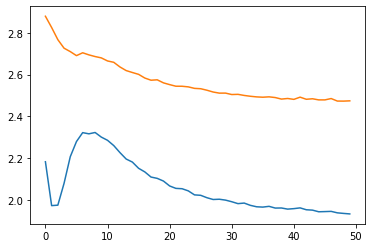

In [298]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.plot(val_losses)

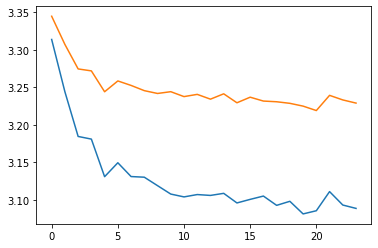

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.plot(val_losses)

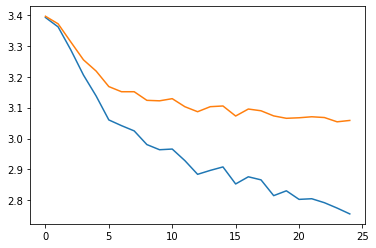

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.plot(val_losses)

In [ ]:
losses

[[],
 tensor(0.6114, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5973, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5856, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5585, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5698, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5965, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5834, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6325, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6038, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.6226, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5923, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5570, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5468, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(0.5630, device='cuda:0', grad_fn=<Bina

In [ ]:
import torch

In [ ]:
model2 = Model()

In [ ]:
model2.load_state_dict(torch.load('MyModel_V1.pt'));
model2.eval()

Model(
  (fc1): Linear(in_features=7, out_features=2048, bias=True)
  (bn1): BatchNorm1d(2048, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2048, out_features=2048, bias=True)
  (d2): Dropout(p=0.25, inplace=False)
  (bn2): BatchNorm1d(2048, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=2048, out_features=2048, bias=True)
  (bn3): BatchNorm1d(2048, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (d3): Dropout(p=0.4, inplace=False)
  (fc4): Linear(in_features=2048, out_features=1024, bias=True)
  (bn4): BatchNorm1d(1024, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (d4): Dropout(p=0.3, inplace=False)
  (fc5): Linear(in_features=1024, out_features=900, bias=True)
  (bn5): BatchNorm1d(900, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (d5): Dropout(p=0.25, inplace=False)
  (fc6): Linear(in_features=900, out_features=900, bias=True)
  

In [ ]:
x_test_i , y_test_i = test_set.__getitem__(0)

In [ ]:
model2(torch.unsqueeze(x_test_i.type(torch.float),0))

tensor([[0.3684]], grad_fn=<SigmoidBackward0>)

In [ ]:
y_test_i

tensor(0)

In [ ]:
device = torch.device("cpu")
model2.to(device)

Model(
  (fc1): Linear(in_features=7, out_features=2048, bias=True)
  (bn1): BatchNorm1d(2048, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2048, out_features=2048, bias=True)
  (d2): Dropout(p=0.25, inplace=False)
  (bn2): BatchNorm1d(2048, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=2048, out_features=2048, bias=True)
  (bn3): BatchNorm1d(2048, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (d3): Dropout(p=0.4, inplace=False)
  (fc4): Linear(in_features=2048, out_features=1024, bias=True)
  (bn4): BatchNorm1d(1024, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (d4): Dropout(p=0.3, inplace=False)
  (fc5): Linear(in_features=1024, out_features=900, bias=True)
  (bn5): BatchNorm1d(900, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (d5): Dropout(p=0.25, inplace=False)
  (fc6): Linear(in_features=900, out_features=900, bias=True)
  

In [ ]:
  
def test_set_check(model):
    losses_test = []
    correct_test = 0
    total_test = 0
    acc = []

    for (xi,yi) in test_loader:
        xi = xi.to(device)
        yi = yi.to(device)
        output_test = torch.squeeze(model(xi.type(torch.float)))

        loss_test = criterion(output_test.type(torch.float),yi.type(torch.float))

        predicted_test = output_test.round().detach().numpy()
        total_test += yi.size(0)
        correct_test += np.sum(predicted_test == yi.detach().numpy())
        accuracy_test = 100 * correct_test/total_test
        acc.append(accuracy_test)
        losses_test.append(loss_test.item())
    return np.mean(np.array(acc)),np.mean(np.array(losses_test))

In [ ]:
np.mean(np.array(acc))

65.08077411458603

In [ ]:
test_set_check(model2)

(63.084559438149284, 0.6027838253899466)